In [ ]:
#1.IMPORTING THE REQUIRED LIBRARIES AND DATASET AS .CSV file

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#2.CLEANING THE DATA - Checking for any null values present in the dataset and ploting the Outliers for further implementation.   

In [71]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

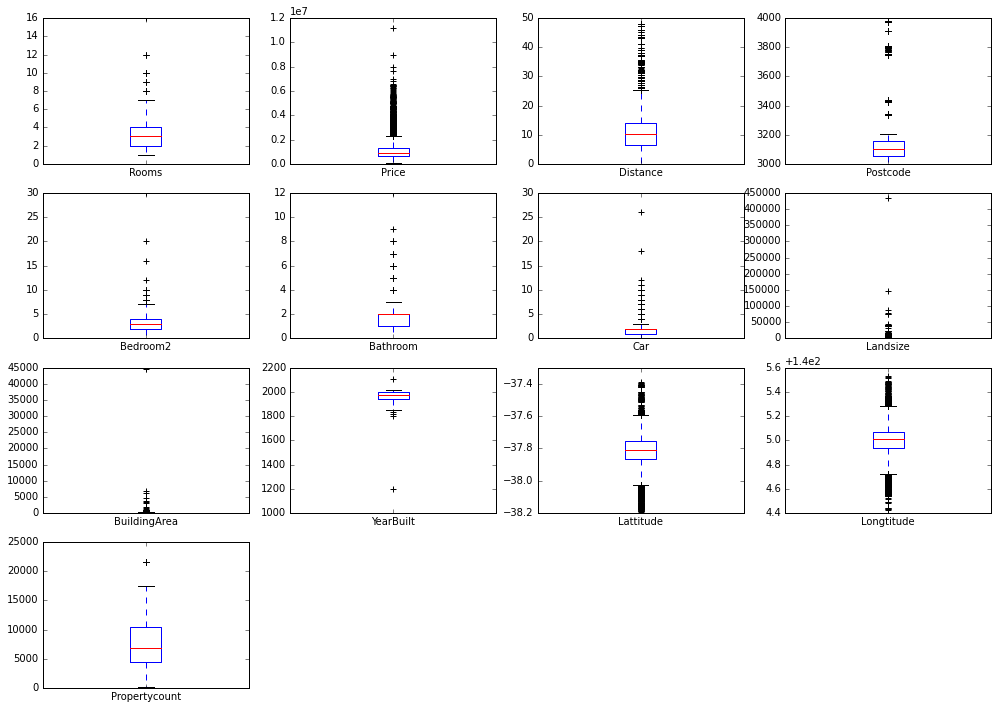

In [72]:
df.plot(kind='box', subplots = True, layout = (4,4), fontsize = 10, figsize = (17,12));

In [ ]:
#3. TRAINING THE DATA

In [73]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [74]:
train_col = ['Suburb', 'Rooms', 'Method', 'Date', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
             'YearBuilt', 'Lattitude', 'Longtitude', 'Distance', 'Price']
df_train = df[train_col].dropna().reset_index(drop=True)
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train['year'] = [x.year for x in df_train['Date']]
df_train['month'] = [x.month for x in df_train['Date']]

In [75]:
df_train.head(5)

,Suburb,Rooms,Method,Date,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Distance,Price,year,month
0,Abbotsford,2,S,2016-04-02,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,2.5,1035000.0,2016,4
1,Abbotsford,3,SP,2017-04-03,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,2.5,1465000.0,2017,4
2,Abbotsford,4,VB,2016-04-06,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,2.5,1600000.0,2016,4
3,Abbotsford,3,S,2016-07-05,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,2.5,1876000.0,2016,7
4,Abbotsford,2,S,2016-08-10,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,2.5,1636000.0,2016,8


In [ ]:
#4. DATAFRAMES FOR REPLACEMENT VALUES for the required set.

In [76]:
suburban = list(df_train.Suburb.value_counts().index)
col_rep = train_col
for r in ['Method', 'Date', 'Suburb']:
    col_rep.remove(r) 
stat_col = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
end_col = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1]

In [77]:
def search_vals(dx, x, z):
    dx_mean = dx.mean()
    dx_mode = dx.mode()[0]
    
    q1 = dx.quantile(0.25)
    q3 = dx.quantile(0.75)
    iqr = q3 - q1
    
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    if x == 0:
        y = dx_mean
    else:
        y = dx_mode
        
    if (z == 1) & (lower < 0):
        lower = 0
        
    if z == 1:
        y = int(y)
        upper = int(upper)
        lower = int(lower)
    
    return round(y, 2), upper, lower

In [78]:
replacement = {}
for x in suburban:
    app = {}
    for c, i, j in zip(col_rep, stat_col, end_col):
        app[c] = list(search_vals(df_train[df_train['Suburb'] == x][c], i, j))
    replacement[x] = app

In [79]:
for i in range(4):
    print(suburban[i], '\n', replacement[suburban[i]], '\n')

Reservoir 
 {'Rooms': [3, 4, 0], 'Bathroom': [1, 3, 0], 'Car': [1, 3, 0], 'Landsize': [428, 1261, 0], 'BuildingArea': [120, 207, 11], 'YearBuilt': [1974.46, 2085.0, 1869.0], 'Lattitude': [-37.71, -37.683052499999995, -37.74471250000001], 'Longtitude': [145.01, 145.0563625, 144.96334249999998], 'Distance': [11, 13, 9], 'Price': [662421, 1376250, 0]} 

Richmond 
 {'Rooms': [2, 4, 0], 'Bathroom': [1, 3, 0], 'Car': [1, 1, 1], 'Landsize': [633, 546, 0], 'BuildingArea': [101, 202, 0], 'YearBuilt': [1955.01, 2162.5, 1742.5], 'Lattitude': [-37.82, -37.803050000000006, -37.83504999999999], 'Longtitude': [145.0, 145.0255025, 144.97928250000004], 'Distance': [2, 2, 2], 'Price': [1091469, 2444250, 0]} 

Brunswick 
 {'Rooms': [3, 4, 0], 'Bathroom': [1, 3, 0], 'Car': [1, 1, 1], 'Landsize': [341, 722, 0], 'BuildingArea': [129, 250, 0], 'YearBuilt': [1939.55, 2060.75, 1818.75], 'Lattitude': [-37.77, -37.74216249999999, -37.790462500000004], 'Longtitude': [144.96, 144.98194624999996, 144.94157625000003

In [80]:
#5. EDITING THE OUTLIERS

In [81]:
dx_suburb = df_train['Suburb']
for c in col_rep:
    change = []
    for i, s in enumerate(dx_suburb):
        v = df_train.loc[i, c]
        u = replacement[s][c][1]
        l = replacement[s][c][2]
        if v > u:
            v = u
        elif v < l:
            v = l
        change.append(v)
    df_train[c] = change

In [82]:
df_train.head(5)

,Suburb,Rooms,Method,Date,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Distance,Price,year,month
0,Abbotsford,2,S,2016-04-02,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,2.5,1035000.0,2016,4
1,Abbotsford,3,SP,2017-04-03,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,2.5,1465000.0,2017,4
2,Abbotsford,4,VB,2016-04-06,1.0,1.0,120.0,142.0,2014.0,-37.8072,144.9941,2.5,1600000.0,2016,4
3,Abbotsford,3,S,2016-07-05,2.0,0.0,245.0,194.0,1910.0,-37.8024,144.9993,2.5,1815000.0,2016,7
4,Abbotsford,2,S,2016-08-10,1.0,1.0,256.0,107.0,1890.0,-37.8060,144.9954,2.5,1636000.0,2016,8


In [ ]:
#6. TRAINING THE MODEL to check for the error variations using MSE and MAPE

In [83]:
from sklearn.preprocessing import MinMaxScaler

x_cols = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
          'Lattitude', 'Longtitude', 'Distance', 'year', 'month']
train_x = df_train[x_cols]
train_y = df_train['Price']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

new_train_x = scaler_x.fit_transform(train_x)
new_train_y = scaler_y.fit_transform(np.array(train_y).reshape(-1, 1))


In [84]:
new_train_x

array([[0.2       , 0.        , 0.        , ..., 0.0326087 , 0.        ,
        0.27272727],
       [0.4       , 0.2       , 0.        , ..., 0.0326087 , 0.5       ,
        0.27272727],
       [0.6       , 0.        , 0.125     , ..., 0.0326087 , 0.        ,
        0.27272727],
       ...,
       [0.2       , 0.2       , 0.125     , ..., 0.11521739, 1.        ,
        0.09090909],
       [0.2       , 0.        , 0.25      , ..., 0.11521739, 1.        ,
        0.09090909],
       [0.2       , 0.        , 0.        , ..., 0.11521739, 1.        ,
        0.09090909]])

In [85]:
new_train_y

array([[0.1654617 ],
       [0.24416583],
       [0.26887526],
       ...,
       [0.13855587],
       [0.10506086],
       [0.16271621]])

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

x_train, x_valid, y_train, y_valid = train_test_split(new_train_x, new_train_y, test_size=0.2)

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_valid) 
error = np.sqrt(mean_squared_error(y_pred, y_valid))
error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.04656663666167402

In [87]:
error1= mean_absolute_percentage_error(y_valid, y_pred)
error1*100

16.86079176678108

In [ ]:
#7. EDITING ALL OUTLIERS

In [88]:
da_suburb = df['Suburb'].value_counts().index
not_in_the_list = []
for d in da_suburb:
    if d not in suburban:
        not_in_the_list.append(d)
print('The suburb that is not in the list :')
for i, s in enumerate(not_in_the_list):
    print((i+1), s)

The suburb that is not in the list :
1 MacLeod
2 Docklands
3 Laverton
4 Lilydale
5 New Gisborne
6 Heatherton
7 Clyde North
8 Rockbank
9 Cranbourne West
10 Warranwood
11 Wonga Park
12 Eumemmerring
13 Lynbrook
14 Darley
15 Plenty
16 Silvan
17 Werribee South
18 Tecoma
19 Wandin North
20 Fawkner Lot
21 Belgrave
22 Coldstream
23 viewbank
24 Ferny Creek
25 Monbulk
26 Guys Hill
27 Eynesbury
28 Avonsleigh
29 Menzies Creek
30 Hopetoun Park
31 Wildwood
32 Cranbourne East
33 Bulla
34 Olinda
35 croydon
36 Kalkallo


In [89]:
len(df[df.Suburb.isin(not_in_the_list)])

179

In [ ]:
drop_ind = df[df.Suburb.isin(not_in_the_list)].index
df = df.drop(drop_ind)
df = df.reset_index(drop=True)
df = df.drop(['Bedroom2'], axis=1)

In [ ]:
dx_suburb = df['Suburb']
for c in col_rep:
    changed = []
    for i, s in enumerate(dx_suburb):
        v = df.loc[i, c]
        u = replacement[s][c][1]
        l = replacement[s][c][2]
        if v > u:
            v = u
        elif v < l:
            v = l
        changed.append(v)
    df[c] = changed

In [ ]:
#8. FILLING IN NULL VALUES

In [ ]:
dfs = df['Suburb']
col_rep.remove('Price')

for c in col_rep:
    dfc = df[c]
    null = dfc.isnull()
    changed = []
    for i, d, s in zip(null, dfc, dfs):
        if  i == True:
            d = replacement[s][c][0] 
        changed.append(d)
    df[c] = changed

In [ ]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7565
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         2
Lattitude           0
Longtitude          0
Regionname          2
Propertycount       2
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = [x.year for x in df['Date']]
df['month'] = [x.month for x in df['Date']]

In [ ]:
from tqdm.auto import tqdm

price_null = df['Price'].isnull()
x_ = scaler_x.transform(df[x_cols])
new_ = []
progress_bar = tqdm(range(len(df)))

for n, i, p in zip(price_null, x_, df['Price']):
    if n == True:
        p = rf_model.predict(i.reshape(1, -1))
        p = scaler_y.inverse_transform(p.reshape(-1, 1))[0, 0]
    new_.append(p)
    progress_bar.update(1)
    
df['Price'] = new_

  0%|          | 0/34678 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      2
Lattitude        0
Longtitude       0
Regionname       2
Propertycount    2
year             0
month            0
dtype: int64

In [ ]:
error1= mean_absolute_percentage_error(y_valid, y_pred)
error1*100

17.443057094149967

In [ ]:
df = df.dropna()
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,month
0,Abbotsford,68 Studley St,2,House,1171442.50,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,108.0,1945.41,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,3
1,Abbotsford,85 Turner St,2,House,1480000.00,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,108.0,1945.41,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
2,Abbotsford,25 Bloomburg St,2,House,1035000.00,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.00,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
3,Abbotsford,18/659 Victoria St,3,Duplex,1067033.75,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,108.0,1945.41,Yarra City Council,-37.8114,145.0012,Northern Metropolitan,4019.0,2016,4
4,Abbotsford,5 Charles St,3,House,1465000.00,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.00,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4


In [ ]:
#9.ANAYLSING THE TRAINED DATA

In [ ]:
arr = []
for i in df['Type']:
    if i == 'h':
        arr.append('House')
    elif i == 't':
        arr.append('Townhouse')
    elif i == 'u':
        arr.append('Duplex')
df['Type'] = arr

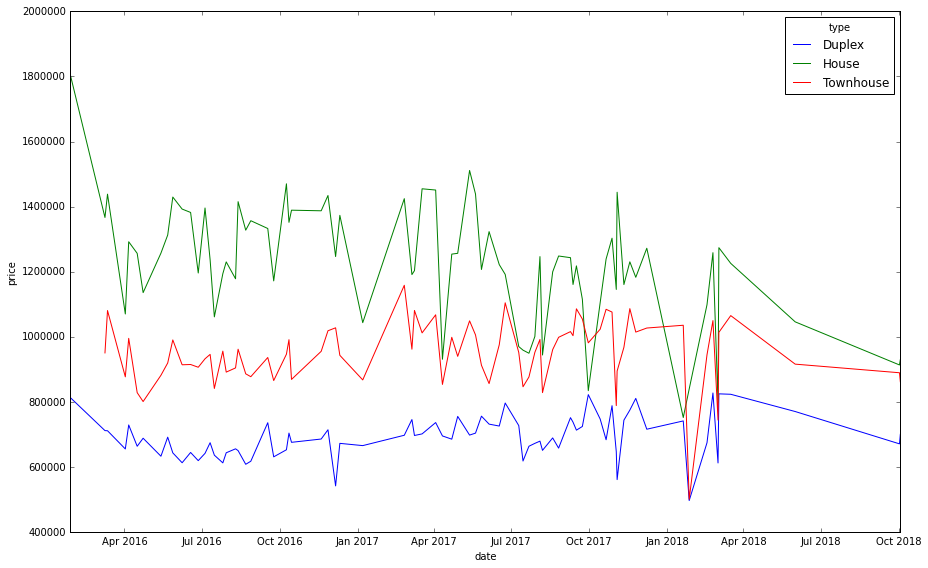

In [ ]:
data = df[["Type", "Date", "Price"]]
d = data.groupby( by = ["Type", "Date"] ).mean()

new_type = []
new_date = []
new_price = []

for i, j in zip(d.index, d.Price):
    y, z = i
    new_type.append(y)
    new_date.append(z)
    new_price.append(j)
    
new_da = pd.DataFrame({"type":new_type, "date":new_date, "price":new_price})

plt.figure(figsize=(13, 8))
sns.lineplot(data=new_da, x="date", y="price", hue="type")
plt.tight_layout()

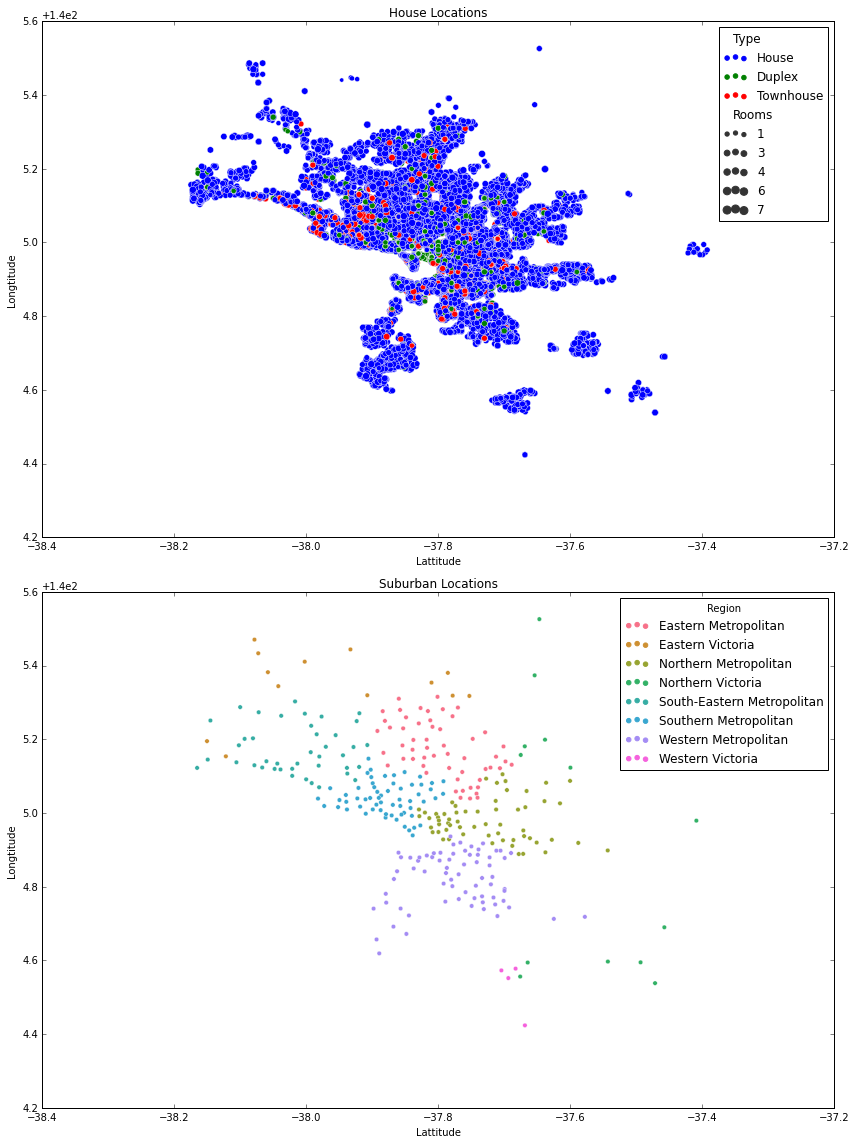

In [ ]:
dx = df[["Regionname", "Suburb", "Price", "Lattitude", "Longtitude"]].groupby(by=["Regionname", "Suburb"]).mean()
dx_region = [i for i, j in dx.index]
dx_suburb = [j for i, j in dx.index]

dx["Region"] = dx_region
dx["Suburb"] = dx_suburb
dx = dx.reset_index(drop=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 16))
sns.scatterplot(data=df, x="Lattitude", y="Longtitude", hue="Type", size="Rooms", ax=ax[0])
ax[0].set_title("House Locations")
sns.scatterplot(data=dx, x="Lattitude", y="Longtitude", hue="Region", ax=ax[1])
ax[1].set_title("Suburban Locations")
plt.tight_layout()

In [ ]:
df.Regionname.value_counts()

Southern Metropolitan         11820
Northern Metropolitan          9473
Western Metropolitan           6782
Eastern Metropolitan           4371
South-Eastern Metropolitan     1724
Eastern Victoria                200
Northern Victoria               195
Western Victoria                111
Name: Regionname, dtype: int64

In [ ]:
d = df[["Regionname", "Date", "Price"]].groupby(by=["Regionname", "Date"]).mean()
region_d = []
date_d = []
price_d = []

for i, j in zip(d.index, d["Price"]):
    y, z = i
    region_d.append(y)
    date_d.append(z)
    price_d.append(j)
    
new_data = pd.DataFrame({"date":date_d, "region":region_d, "price":price_d})

Text(0.5, 1.0, "Victoria Area's Price Fluctuation")

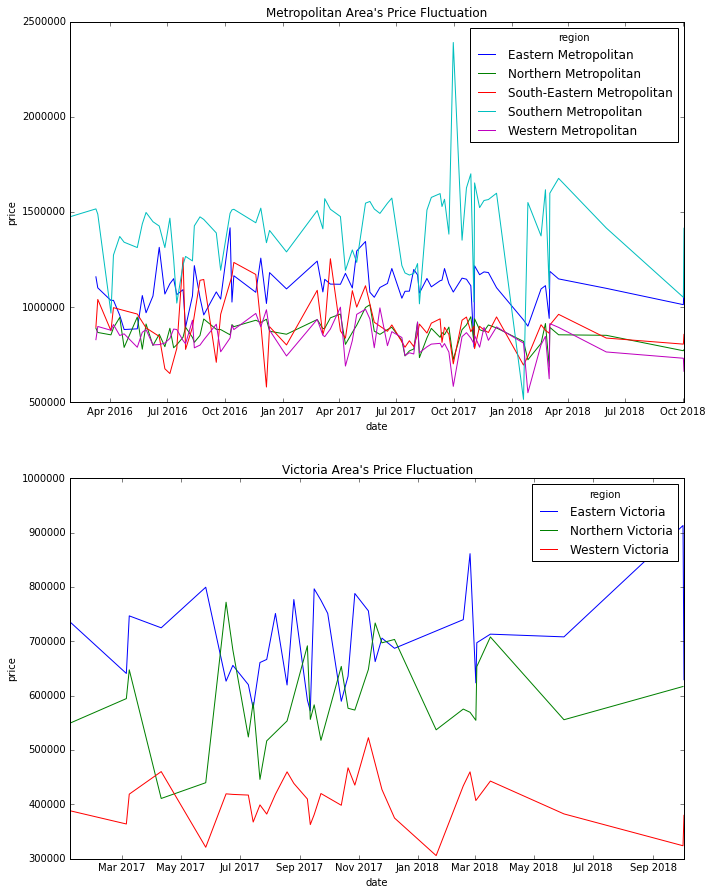

In [ ]:
metro_area = ["Southern Metropolitan", "Northern Metropolitan", "Western Metropolitan",
                "Eastern Metropolitan", "South-Eastern Metropolitan"]
victoria_area = ["Eastern Victoria", "Northern Victoria", "Western Victoria"]

fig, ax = plt.subplots(2, 1, figsize=(11, 15))
sns.lineplot(data=new_data[new_data.region.isin(metro_area)], x="date", y="price", hue="region", ax=ax[0])
ax[0].set_title("Metropolitan Area's Price Fluctuation")
sns.lineplot(data=new_data[new_data.region.isin(victoria)], x="date", y="price", hue="region", ax=ax[1])
ax[1].set_title("Victoria Area's Price Fluctuation")

In [ ]:
#End